In [43]:
import pandas as pd
import numpy as np

In [44]:
datos = pd.read_csv('netflix_customer_churn.csv')
datos.head(10)

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action
5,d8079475-5be7-47e9-8782-ceb7ff61395e,58,Female,Standard,13.80,26,Oceania,Mobile,13.99,0,Debit Card,3,0.51,Action
6,8e63450a-13d6-4e83-bbb5-6aebde9152cb,48,Other,Basic,13.83,20,Asia,TV,8.99,0,Gift Card,5,0.66,Romance
7,02387681-8c42-462a-807a-de0168c73b38,51,Male,Basic,14.30,56,Europe,Mobile,8.99,1,Gift Card,1,0.25,Action
8,0bcaad0c-545c-4ee1-85a6-75e165f39361,45,Other,Basic,9.98,10,Asia,Mobile,8.99,0,PayPal,3,0.91,Romance
9,eae6439e-8cdf-4258-ab49-c493925b927a,32,Other,Premium,2.22,34,Europe,TV,17.99,1,Debit Card,1,0.06,Drama


In [45]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

In [46]:
#Eliminacion filas duplicadas
datos = datos.drop_duplicates()

In [47]:
#Eliminacion de nulos
datos = datos.replace(["", " ", "NA", "N/A"], np.nan)

In [48]:
#verificar si hay valores nulos
datos.isnull().sum()

,0
customer_id,0
age,0
gender,0
subscription_type,0
watch_hours,0
last_login_days,0
region,0
device,0
monthly_fee,0
churned,0


In [49]:
#separar columnas numericas y categoricas
numeric_cols = datos.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = datos.select_dtypes(include="object").columns

In [50]:
#coumnas numericas -> mediana
for col in numeric_cols:
    datos[col] = datos[col].fillna(datos[col].median())

In [51]:
#columna categoricas -> moda
for col in categorical_cols:
    datos[col] = datos[col].fillna(datos[col].mode()[0])

In [52]:
#cambiar categorical por category
datos[categorical_cols] = datos[categorical_cols].astype("category")

In [53]:
#verificacion final
datos.info()
datos.isnull().sum()
datos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   customer_id             5000 non-null   category
 1   age                     5000 non-null   int64   
 2   gender                  5000 non-null   category
 3   subscription_type       5000 non-null   category
 4   watch_hours             5000 non-null   float64 
 5   last_login_days         5000 non-null   int64   
 6   region                  5000 non-null   category
 7   device                  5000 non-null   category
 8   monthly_fee             5000 non-null   float64 
 9   churned                 5000 non-null   int64   
 10  payment_method          5000 non-null   category
 11  number_of_profiles      5000 non-null   int64   
 12  avg_watch_time_per_day  5000 non-null   float64 
 13  favorite_genre          5000 non-null   category
dtypes: category(7), float64(

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


##Modelo RandomForestClassifier

In [54]:
del datos['customer_id']

In [55]:
del datos['gender']

In [56]:
datos.head(10)

,age,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,51,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,47,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,27,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,53,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,56,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action
5,58,Standard,13.80,26,Oceania,Mobile,13.99,0,Debit Card,3,0.51,Action
6,48,Basic,13.83,20,Asia,TV,8.99,0,Gift Card,5,0.66,Romance
7,51,Basic,14.30,56,Europe,Mobile,8.99,1,Gift Card,1,0.25,Action
8,45,Basic,9.98,10,Asia,Mobile,8.99,0,PayPal,3,0.91,Romance
9,32,Premium,2.22,34,Europe,TV,17.99,1,Debit Card,1,0.06,Drama


In [57]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   age                     5000 non-null   int64   
 1   subscription_type       5000 non-null   category
 2   watch_hours             5000 non-null   float64 
 3   last_login_days         5000 non-null   int64   
 4   region                  5000 non-null   category
 5   device                  5000 non-null   category
 6   monthly_fee             5000 non-null   float64 
 7   churned                 5000 non-null   int64   
 8   payment_method          5000 non-null   category
 9   number_of_profiles      5000 non-null   int64   
 10  avg_watch_time_per_day  5000 non-null   float64 
 11  favorite_genre          5000 non-null   category
dtypes: category(5), float64(3), int64(4)
memory usage: 299.1 KB


##Ingenieria de Funciones

In [58]:
#Separacion de variables (Categoricas y numericas)
df_numerico = datos.select_dtypes(include=['int64', 'float64'])
df_numerico

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
0,51,14.73,29,8.99,1,1,0.49
1,47,0.70,19,13.99,1,5,0.03
2,27,16.32,10,13.99,0,2,1.48
3,53,4.51,12,17.99,1,2,0.35
4,56,1.89,13,13.99,1,2,0.13
...,...,...,...,...,...,...,...
4995,19,49.17,11,8.99,0,4,4.10
4996,67,9.24,2,8.99,0,3,3.08
4997,66,16.55,49,13.99,1,2,0.33
4998,59,9.12,3,8.99,0,4,2.28


In [63]:
df_categorico = datos.select_dtypes(include=['category'])
df_categorico

,subscription_type,region,device,payment_method,favorite_genre
0,Basic,Africa,TV,Gift Card,Action
1,Standard,Europe,Mobile,Gift Card,Sci-Fi
2,Standard,Asia,TV,Crypto,Drama
3,Premium,Oceania,TV,Crypto,Horror
4,Standard,Africa,Mobile,Crypto,Action
...,...,...,...,...,...
4995,Basic,Europe,Desktop,Credit Card,Drama
4996,Basic,North America,Desktop,PayPal,Documentary
4997,Standard,South America,Desktop,Debit Card,Action
4998,Basic,Europe,Laptop,Credit Card,Sci-Fi


In [64]:
#utilizando el OneHotEncoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [65]:
one_hot = make_column_transformer((OneHotEncoder(drop = 'if_binary'),
    ['subscription_type','region','device','payment_method','favorite_genre']
),
    remainder = 'passthrough',
    sparse_threshold=0)

In [66]:
df_encoded = one_hot.fit_transform(df_categorico)
columns_names = one_hot.get_feature_names_out()
df_encoded = pd.DataFrame(df_encoded, columns=columns_names)
df_encoded

,onehotencoder__subscription_type_Basic,onehotencoder__subscription_type_Premium,onehotencoder__subscription_type_Standard,onehotencoder__region_Africa,onehotencoder__region_Asia,onehotencoder__region_Europe,onehotencoder__region_North America,onehotencoder__region_Oceania,onehotencoder__region_South America,onehotencoder__device_Desktop,...,onehotencoder__payment_method_Debit Card,onehotencoder__payment_method_Gift Card,onehotencoder__payment_method_PayPal,onehotencoder__favorite_genre_Action,onehotencoder__favorite_genre_Comedy,onehotencoder__favorite_genre_Documentary,onehotencoder__favorite_genre_Drama,onehotencoder__favorite_genre_Horror,onehotencoder__favorite_genre_Romance,onehotencoder__favorite_genre_Sci-Fi
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4996,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


##Verificación de la Proporción de Cancelación (Churned)

In [67]:
df_numerico['churned'].value_counts()

,count
churned,
1,2515
0,2485


In [71]:
#Graficaremos el churn para visualizar la proporcion de cancelacion
import seaborn as sns
import matplotlib.pyplot as plt

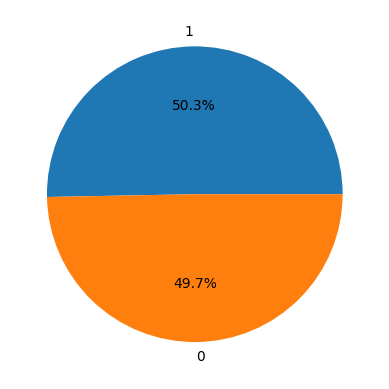

In [72]:
data = df_numerico['churned']
plt.pie(data.value_counts(), labels=data.unique(), autopct='%1.1f%%')
plt.show()

##Preparación de los Datos para el entrenamiento

In [73]:
# Variables (feaures y target)
X = df_encoded
y = df_numerico['churned']

In [74]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [75]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   onehotencoder__subscription_type_Basic     5000 non-null   float64
 1   onehotencoder__subscription_type_Premium   5000 non-null   float64
 2   onehotencoder__subscription_type_Standard  5000 non-null   float64
 3   onehotencoder__region_Africa               5000 non-null   float64
 4   onehotencoder__region_Asia                 5000 non-null   float64
 5   onehotencoder__region_Europe               5000 non-null   float64
 6   onehotencoder__region_North America        5000 non-null   float64
 7   onehotencoder__region_Oceania              5000 non-null   float64
 8   onehotencoder__region_South America        5000 non-null   float64
 9   onehotencoder__device_Desktop              5000 non-null   float64
 10  onehotencoder__device_La

In [76]:
y

,churned
0,1
1,1
2,0
3,1
4,1
...,...
4995,0
4996,0
4997,1
4998,0


In [77]:
#train_test_split me permite hacer la separacion de entrenamiento y prueba
from sklearn.model_selection import train_test_split

In [79]:
#proceder a separar los arrays tanto de las variables explicativas como de la variable respuesta
X,X_test,y,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=5)
X_train,X_val,y_train,y_val = train_test_split(X,y,stratify=y,random_state=5)

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [82]:
rf = RandomForestClassifier(max_depth=5, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [83]:
rf.score(X_train,y_train)

0.63625

In [84]:
y_pred = rf.predict(X_test)

In [85]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [86]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.6
Precision: 0.5990338164251208
Recall: 0.6169154228855721
F1 Score: 0.6078431372549019


In [87]:
from sklearn.metrics import classification_report

In [94]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.48      0.47      0.47       397
           1       0.49      0.50      0.49       403

    accuracy                           0.48       800
   macro avg       0.48      0.48      0.48       800
weighted avg       0.48      0.48      0.48       800

